In [ ]:
%run DecisionTree.ipynb


In [256]:
import matplotlib.pyplot as plt
import numpy as np

In [257]:
max_depth = 4               # got them form the decision tree analysis
min_samples_split = 2

In [258]:
# type: ignore
def get_random_samples_featuers(X,Y):
    n_samples = X.shape[0]
    bootstrap_idx = np.random.choice(n_samples, n_samples, replace=True)

    X_sub = X[bootstrap_idx]
    y_sub = Y[bootstrap_idx]

    return X_sub, y_sub


In [259]:
def plot_rf_accuracies(tree_sizes, max_features_list, accuracies):

    plt.figure(figsize=(10, 6))

    for max_feat in max_features_list:
        plt.plot(tree_sizes, accuracies[max_feat], 
                 marker='o', label=f"max_features = {max_feat}")

    plt.xlabel("Number of Trees in Forest")
    plt.ylabel("Validation Accuracy")
    plt.title("Random Forest Accuracy vs Tree Size for Different max_features")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.show()


In [260]:
# type: ignore

def build_forest(tree_sizes,max_features_values,X_train,y_train,X_val,y_val):
    accuarcies_for_d = {}
    for value in max_features_values:
        accuarcies_for_T = []
        for size in tree_sizes:
            forest = []
            for i in range(0,size):
                # i need to get the random sample and featuers to pass them to .fit
                X_sub, y_sub = get_random_samples_featuers(X_train, y_train)
                tree = DecisionTree(min_samples_split, max_depth, value)
                tree.fit(X_sub, y_sub)
                forest.append(tree)
            predictions = []
            for tree in forest:
                predictions.append(tree.test(X_val))
            predictions = np.array(predictions)
            final_pred = (predictions.mean(axis=0) >= 0.5).astype(int)
            val_acc = np.mean(final_pred == y_val)
            print(f"Forest size {size} and feature size is {value}: accuracy  = {val_acc:.4f}")
            accuarcies_for_T.append(val_acc)
        accuarcies_for_d[value] = accuarcies_for_T
    best_feature = max(accuarcies_for_d,
                    key=lambda mf: max(accuarcies_for_d[mf]))
    best_tree_index = np.argmax(accuarcies_for_d[best_feature])
    best_tree_size = tree_sizes[best_tree_index]

    return accuarcies_for_d,best_feature,best_tree_size




Forest size 5 and feature size is 5: accuracy  = 0.9765
Forest size 10 and feature size is 5: accuracy  = 0.9882
Forest size 30 and feature size is 5: accuracy  = 0.9882
Forest size 50 and feature size is 5: accuracy  = 0.9882
Forest size 5 and feature size is 15: accuracy  = 0.9765
Forest size 10 and feature size is 15: accuracy  = 0.9882
Forest size 30 and feature size is 15: accuracy  = 0.9882
Forest size 50 and feature size is 15: accuracy  = 1.0000

Best accuracy achieved with: 
 max_features = 15
 tree size   = 50
 accuracy    = 1.0000


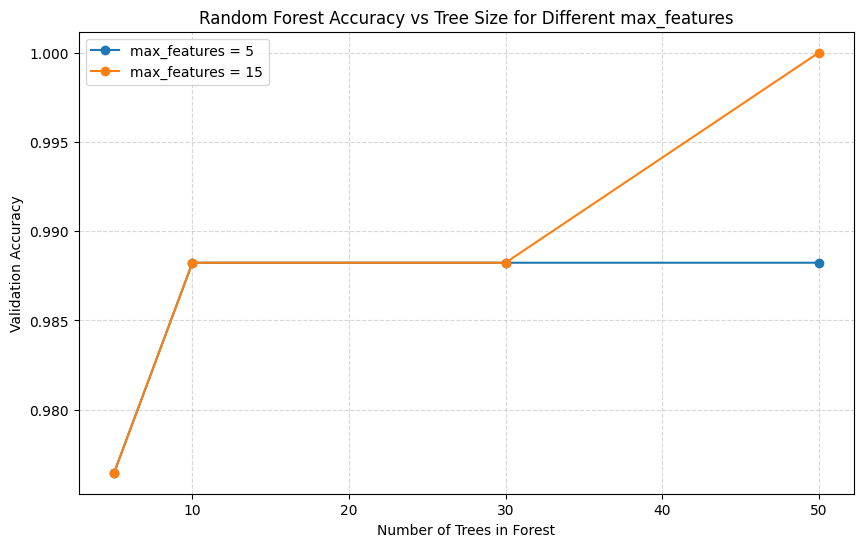

In [261]:
# type: ignore
tree_sizes = [5, 10, 30, 50]
max_features_values = [int(np.sqrt(X_train.shape[1])), int(X_train.shape[1] / 2)]

accuarcies_for_d,best_feature,best_tree_size = build_forest(tree_sizes,max_features_values,X_train,y_train,X_val,y_val)


best_tree_index = np.argmax(accuarcies_for_d[best_feature])
print()
print("Best accuracy achieved with: ")
print(f" max_features = {best_feature}")
print(f" tree size   = {best_tree_size}")
print(f" accuracy    = {accuarcies_for_d[best_feature][best_tree_index]:.4f}")

plot_rf_accuracies(tree_sizes, max_features_values, accuarcies_for_d)

In [262]:
# type: ignore

# retraining the model with the best tree size and no. of featuers using both train + validate data
accuarcies_for_d,_,_ = build_forest([best_tree_size], [best_feature], X_combined, Y_combined, X_test, y_test)

best_tree_index = np.argmax(accuarcies_for_d[best_feature])
print(f" final accuracy   = {accuarcies_for_d[best_feature][best_tree_index]:.4f}")

Forest size 50 and feature size is 15: accuracy  = 0.9070
 final accuracy   = 0.9070


### Single Decision Tree 
A single decision tree is a high-variance model:

    1 -  It can fit very complex patterns in the data.

    2 - But small changes in training data can drastically change the structure of the tree.

    3 - It often overfits, especially when the tree depth is large.

    4 - It has low bias, because it can model highly nonlinear relationships.

This explains why the validation accuracy of a single tree is high, but its generalization may be limited.

### Random Forest 
A Random Forest builds multiple decision trees using:

    * Bootstrap sampling (different subsets of the data)

Then it aggregates their predictions using majority voting.
Benefits:
    
    1 - Reduces variance:
    Since each tree is trained on different data and features, their errors cancel out when averaged.

    2 - Reduces overfitting:
    Individual trees may overfit, but the forest as a whole does not.

    3 - Improves generalization:
    Random Forests typically outperform a single decision tree in real-world settings.